In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

## Perform API Calls

In [11]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
# Starting URL for Weather Map API Call

#print(json.dumps(response, indent = 4, sort_keys = True))
names = []
lat = []
temp = []
humidity = []
cloud = []
wind_speed = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(url).json()
#    pprint(response)
    try:
        names.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(response['name'])
    except:
        continue
weather = {
    'Name':names,
    'Lat':lat,
    'Temp':temp,
    'Humidity':humidity,
    'Cloudiness':cloud,
    'Wind Speed':wind_speed
}
df = pd.DataFrame(weather)
df.head()

Ushuaia
Beringovskiy
New Norfolk
Vaini
Bani Walid
Mataura
Rockhampton
Lasa
Bethel
Port Elizabeth
Qeshm
Rikitea
Atuona
Chuy
Tecpan
Bluff
Yenagoa
Ukiah
Hermanus
Cotofanesti
Martapura
Hilo
Avarua
Ponta do Sol
Hambantota
Fairlie
Punta Arenas
Sabang
Nome
Sola
Castro
Oistins
Nouadhibou
Thompson
Kapaa
Gat
Khatanga
San Quintin
Port Alfred
Severo-Kurilsk
Goundam
Zhangye
Bredasdorp
Georgetown
Iracoubo
Saint-Philippe
East London
Faanui
Mahon
Aykhal
Shymkent
Iqaluit
Hamilton
Busselton
Hobart
Salta
Kangaatsiaq
Carnarvon
Norman Wells
Tura
Barrow
Mbaiki
Pisco
Saldanha
Lavrentiya
Puerto Ayora
Paamiut
Longyearbyen
Laguna
Rio Gallegos
Mokhsogollokh
Hasaki
Saqqez
Luebo
Anadyr
Guerrero Negro
Praya
Turayf
Preobrazheniye
Concepcion del Uruguay
Anloga
Santa Maria
Ulaangom
Alta Floresta
Albany
Cockburn Town
Makrakomi
Jamestown
Kyren
Bonavista
Yulara
Vao
Gandorhun
Esperance
Karratha
Obihiro
Havoysund
Bandraboua
Odienne
Rome
Manaus
Tasiilaq
Labuhan
Hovd
Troy
Saint-Augustin
Bosobolo
Nikolskoye
Mpulungu
Mandiana


,Name,Lat,Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,-54.81,39.20,86,40,17.22
1,Beringovskiy,63.05,45.80,100,92,5.82
2,New Norfolk,-42.78,57.20,62,75,6.93
3,Vaini,15.34,69.24,90,24,2.57
4,Bani Walid,31.76,59.25,85,0,3.69


In [13]:
df.to_csv('City Data.csv')

In [14]:
df.count()

Name          540
Lat           540
Temp          540
Humidity      540
Cloudiness    540
Wind Speed    540
dtype: int64

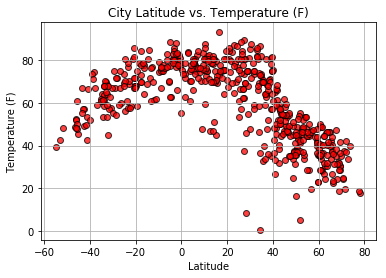

In [16]:
plt.scatter(df['Lat'], df['Temp'], marker= 'o', color='red', edgecolor='black', alpha=0.75)
plt.title('City Latitude vs. Temperature (F)')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('City Latitude vs. Temperature (F).png')

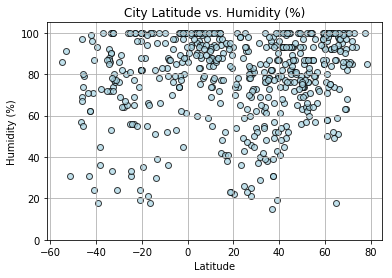

In [18]:
plt.scatter(df['Lat'], df['Humidity'], marker='o', color='lightblue', edgecolor='black', alpha=0.75)
plt.ylim(0,105)
plt.title('City Latitude vs. Humidity (%)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('City Latitude vs. Humidity (%).png')

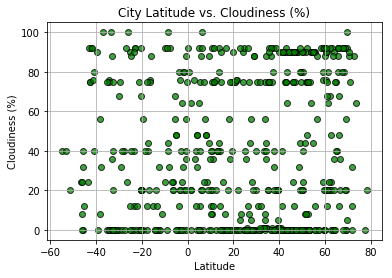

In [19]:
plt.scatter(df['Lat'], df['Cloudiness'], marker='o', color='green', edgecolor='black', alpha=0.75)
plt.title('City Latitude vs. Cloudiness (%)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('City Latitude vs. Cloudiness (%).png')

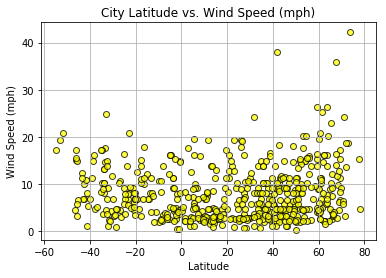

In [20]:
plt.scatter(df['Lat'], df['Wind Speed'], marker='o', color='yellow', edgecolor='black', alpha=0.75)
plt.title('City Latitude vs. Wind Speed (mph)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('City Latitude vs. Wind Speed (mph).png')